In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Import Library Dulu

In [19]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [20]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## Kalo mau liat kuartil, std, rata2, min/max bisa pake describe()

In [21]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


## Lanjut lagi, cek dulu datanya ada yang null nggak?

In [22]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Nah bisa disimpulin nih datanya udah ngga ada yang null, jadi aman.

Tapi kita lihat sekarang di kolom paling awal, Unnamed: 0, itu doi cuma index doang dan ngga akan kepake, so kita hapus dulu

In [23]:
df = df.drop(['Unnamed: 0'], axis=1)

In [24]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


axis=1 menunjukkan karena kita ingin menjatuhkan **kolom** dari dataframe. Kalo axis=0, itu bakal menjatuhkan **baris** dari dataframe.

In [25]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Nah sekarang datanya udah bisa kita mulai analisis

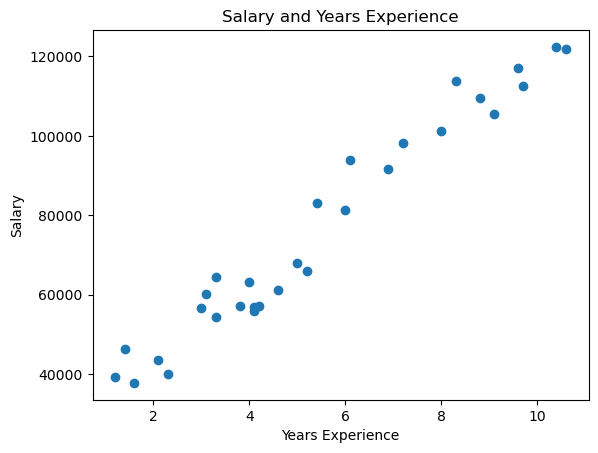

In [27]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Salary and Years Experience")
plt.show()

Sekarang kita coba analisis distribusi masing-masing variabel

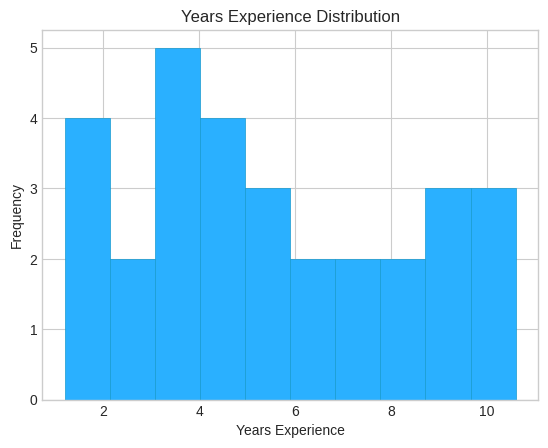

In [37]:
plt.hist(df["YearsExperience"], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xlabel("Years Experience")
plt.ylabel("Frequency")
plt.title("Years Experience Distribution")
plt.show()

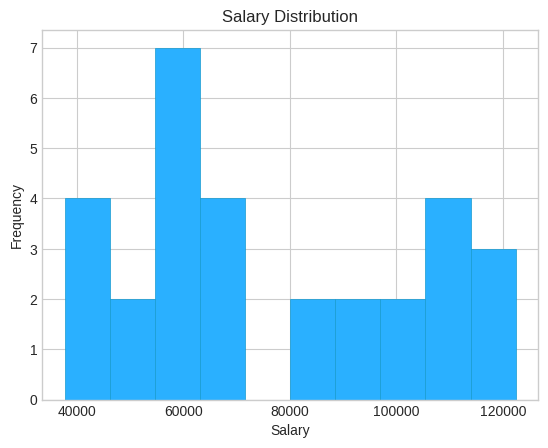

In [36]:
plt.hist(df["Salary"], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

In [38]:
corr = df.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Dari sini kita bisa simpulin kalo antara Years Experience sama Salary punya korelasi kuat soalnya punya korelasi up to 98%

Selanjutee kita bikin model

In [75]:
x = df["YearsExperience"].values
x = x.reshape(-1, 1)

In [92]:
y = df["Salary"].values
y = y.reshape(-1, 1)

In [93]:
y

array([[ 39344.],
       [ 46206.],
       [ 37732.],
       [ 43526.],
       [ 39892.],
       [ 56643.],
       [ 60151.],
       [ 54446.],
       [ 64446.],
       [ 57190.],
       [ 63219.],
       [ 55795.],
       [ 56958.],
       [ 57082.],
       [ 61112.],
       [ 67939.],
       [ 66030.],
       [ 83089.],
       [ 81364.],
       [ 93941.],
       [ 91739.],
       [ 98274.],
       [101303.],
       [113813.],
       [109432.],
       [105583.],
       [116970.],
       [112636.],
       [122392.],
       [121873.]])

In [94]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.3)

In [95]:
model = LinearRegression()

In [96]:
model.fit(x_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(x_test)

In [101]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [102]:
r2

0.9448592558493267

In [103]:
mse

48188932.130598545

`mean_squared_error(y_test, y_pred)` itu buat ngitung rata-rata kuadrat perbedaan antara nilai yang sebenarnya (`y_test`) dan nilai yang diprediksi (`y_pred`). Ini intinya sebagai `ukuran` seberapa baik sih model kita buat ngeprediksi nilai yang asli.

`r2_score(y_test, y_pred)` buat ngitung koefisien determinasi R^2 dari prediksi. Ini intinya sebagai patokan seberapa baik model kita dalam menjelaskan varians dalam data. Nilai R^2 tu kisaran antara 0 dan 1, kalo semakin mendekati angka 1 menunjukkan bahwa model menjelaskan semua varians dalam data.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

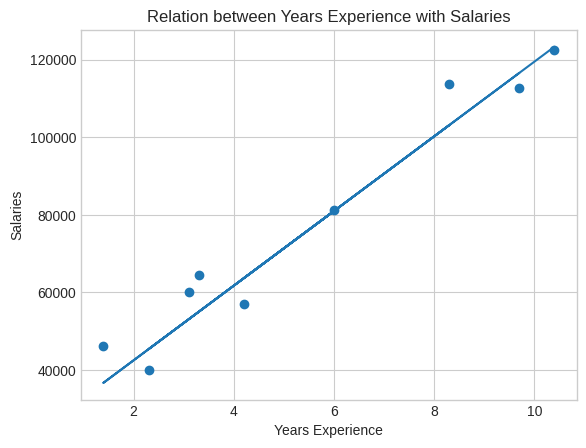

In [105]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred)
plt.xlabel("Years Experience")
plt.ylabel("Salaries")
plt.title("Relation between Years Experience with Salaries")
plt.plot